Libraries

In [1133]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
import matplotlib.pyplot as plt
from src.utils import FluxoniumManager
sq.settings.T1_DEFAULT_WARNING=False
sq.set_units('GHz')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 /Users/joancaceres/anaconda3/envs/ferbo/lib/python3.11/site-packages/scqubits/core/units.py: 64

# Fluxonium

In [989]:
bounds = {
    "small junction area (µm2)":    (0.01, 0.73/4),
    "hundreds of JJs":              (0.5,4),
    "external phase":               (0,0.5)
    }

optimal = FluxoniumManager()
optimal.minimizer(bounds=bounds)
fluxonium = optimal.optimal_fluxonium

In [1092]:
np.sqrt(0.17)

0.41231056256176607

In [1136]:
optimal.result

 message: Optimization terminated successfully.
 success: True
     fun: 2.853722747589288e-07
       x: [ 1.689e-01  1.392e+00  5.000e-01]
     nit: 81
    nfev: 3694

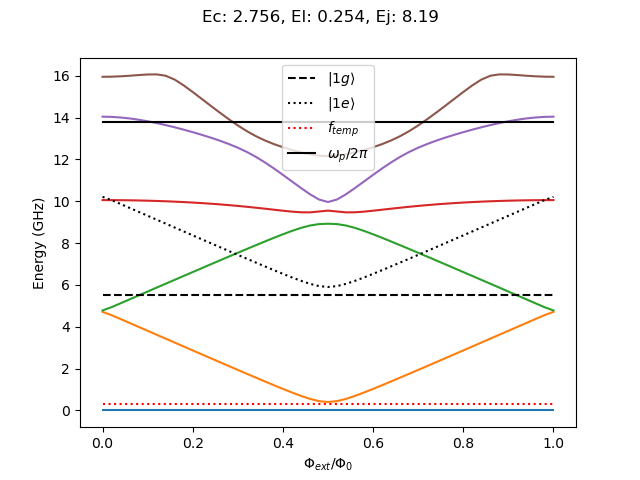

In [1137]:
%matplotlib widget
optimal.plot_evals_vs_flux(resonator_freq=5.5, plasma_freq=13.8)

Text(0.5, 0.98, 'Ec: 2.756, El: 0.254, Ej: 8.19, flux: 0.5')

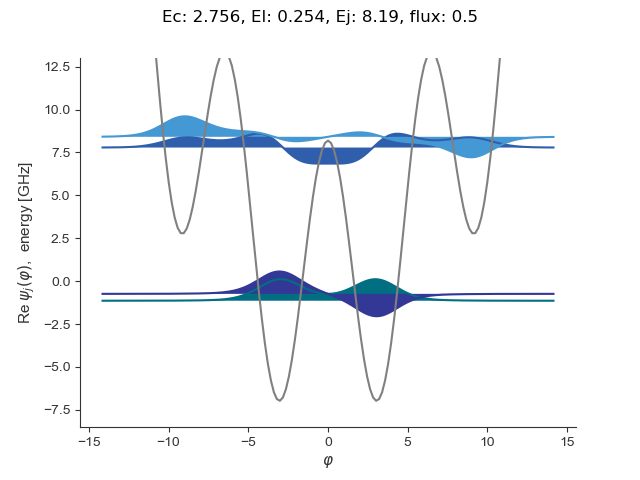

In [1138]:
fig, ax = fluxonium.plot_wavefunction([0,1,2,3])
fig.suptitle(f'Ec: {np.round(fluxonium.EC,3)}, El: {np.round(fluxonium.EL,3)}, Ej: {np.round(fluxonium.EJ,3)}, flux: {np.round(fluxonium.flux,2)}')

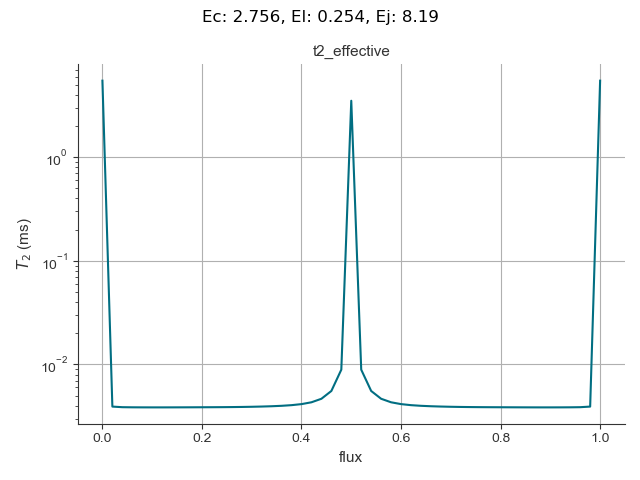

In [1139]:
# flux_array = np.linspace(-0.5, 0.5, 101)
fig, ax = fluxonium.plot_t2_effective_vs_paramvals(param_name='flux',
                                     param_vals=optimal.flux_array,
                                     noise_channels=['tphi_1_over_f_cc','tphi_1_over_f_flux',('t1_flux_bias_line', dict(M=1000)), 't1_inductive', ('t1_quasiparticle_tunneling', dict(Delta = 0.0002))],
                                     scale=1e-6
                                     )
fig.suptitle(f'Ec: {np.round(fluxonium.EC,3)}, El: {np.round(fluxonium.EL,3)}, Ej: {np.round(fluxonium.EJ,3)}')
ax.set_ylabel(r'$T_2$ (ms)')
fig.tight_layout()

# Fluxonium-resonator

In [1140]:
# resonator_freq_list = np.linspace(4,7,50)
# chi_list_res = np.zeros_like(resonator_freq_list)
# for i, resonator_freq in enumerate(resonator_freq_list):
#     fluxonium_resonator = optimal.fluxonium_resonator_creator(resonator_frequency=resonator_freq, EL_resonator=33/180, beta=0.1)
#     subst_eigvals = fluxonium_resonator.eigenvals(evals_count=4) - fluxonium_resonator.eigenvals()[0]
#     chi_list_res[i] = ((subst_eigvals[3]-subst_eigvals[1])-(subst_eigvals[2]-subst_eigvals[0]))*1e3

beta_list = np.linspace(0.0001,0.15, 50)
chi_list_beta = np.zeros_like(beta_list)
for i, beta in enumerate(beta_list):
    fluxonium_resonator = optimal.fluxonium_resonator_creator(resonator_frequency=5.5, EL_resonator=33/180, beta=beta)
    subst_eigvals = fluxonium_resonator.eigenvals(evals_count=4) - fluxonium_resonator.eigenvals()[0]
    chi_list_beta[i] = ((subst_eigvals[3]-subst_eigvals[1])-(subst_eigvals[2]-subst_eigvals[0]))*1e3


# EL_res_list = np.linspace(0.19,2, 50)
# chi_list_el = np.zeros_like(EL_res_list)
# for i, EL_res in enumerate(EL_res_list):
#     fluxonium_resonator = optimal.fluxonium_resonator_creator(resonator_frequency=5.5, EL_resonator=EL_res, beta=0.03)
#     subst_eigvals = fluxonium_resonator.eigenvals(evals_count=4) - fluxonium_resonator.eigenvals()[0]
#     chi_list_el[i] = ((subst_eigvals[3]-subst_eigvals[1])-(subst_eigvals[2]-subst_eigvals[0]))*1e3



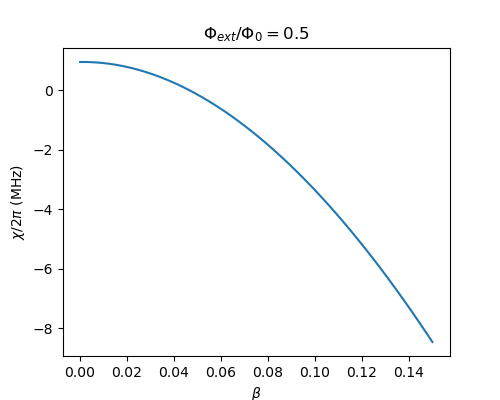

In [1130]:
fig,ax = plt.subplots(1,1, sharey=True, figsize = (5,4))
# ax[0].plot(resonator_freq_list,chi_list_res)
ax.set_title(rf'$\Phi_{{ext}}/\Phi_0 = 0.5$')
ax.plot(beta_list,chi_list_beta)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\chi/2\pi$ (MHz)')
# ax[2].plot(1/EL_res_list,chi_list_el)
plt.show()

TypeError: FluxoniumManager.fluxonium_resonator_creator() takes 3 positional arguments but 4 were given

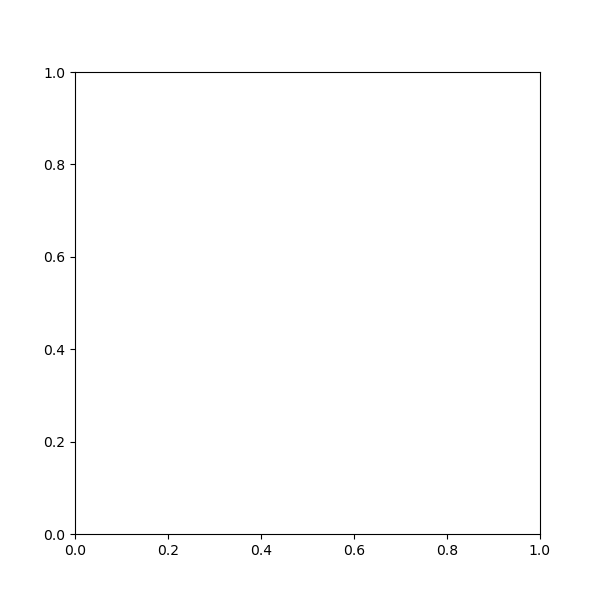

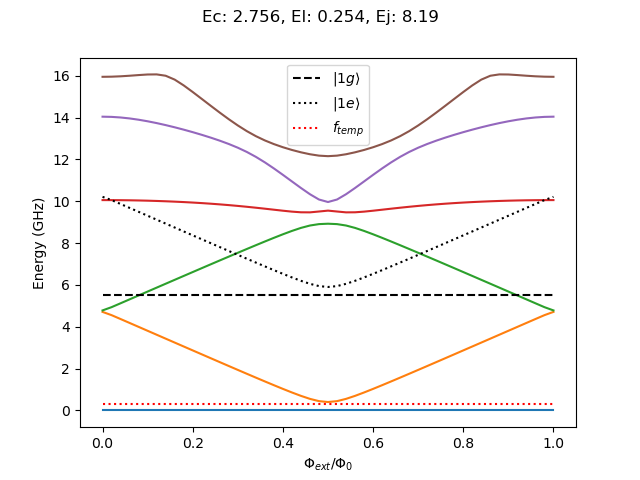

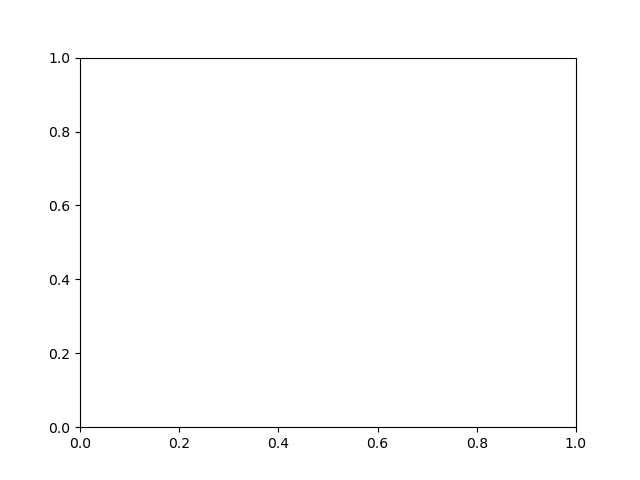

In [1141]:
optimal.flux_array = np.linspace(0,1, 51)
fig,ax = plt.subplots(1,1,sharey='row', figsize=(6,6))
optimal.plot_evals_vs_flux(resonator_freq=5.5)#,ax=ax[0,0])
optimal.plot_evals_fluxonium_resonator_vs_flux(resonator_frequency=5.5,beta=0.12, evals_count=10)#, ax=ax[0,1])

aux = optimal.evals_fluxonium_resonator_vs_flux
chi = ((aux[:,3]-aux[:,1])-(aux[:,2]-aux[:,0]))*1e3
chi2 = ((aux[:,4]-aux[:,1])-(aux[:,2]-aux[:,0]))*1e3
# chi3 = ((aux[:,5]-aux[:,1])-(aux[:,2]-aux[:,0]))*1e3
ax.plot(optimal.flux_array,chi,color='k')
ax.plot(optimal.flux_array,chi2,color='k')
ax.set_ylim([-6,0])
ax.set_ylabel(r'$\chi/2\pi$ (MHz)')
ax.set_xlabel(r'$\Phi_{ext}/\Phi_0$')

fig.tight_layout()

In [1086]:
140*0.12

16.8

In [1131]:
fluxonium_resonator

Circuit_1160

In [952]:
phi1_array = np.linspace(0,1,201)
eigensys_array = np.zeros((len(phi1_array),5))
for i, phi1 in enumerate(phi1_array):
    fluxonium_resonator.Φ1 = phi1
    eigvals = fluxonium_resonator.eigenvals(evals_count=5)
    eigensys_array[i] = eigvals

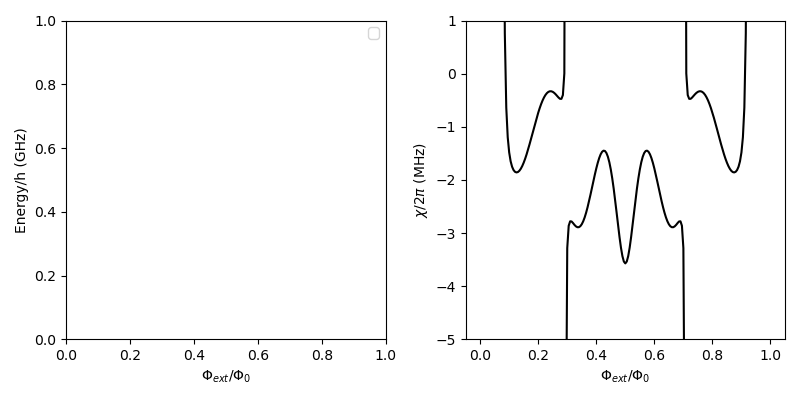

In [1119]:
%matplotlib widget
fig, ax = plt.subplots(1,2, figsize=(8,4))
# ax[0].plot(phi1_array,eigensys_array[:,1]-eigensys_array[:,0], label=r'$(E_{0e}-E_{0g})/h$')
# ax[0].plot(phi1_array,eigensys_array[:,5]-eigensys_array[:,0], label=r'$(E_{1g}-E_{0g})/h$')
ax[1].plot(phi1_array,1e3*((eigensys_array[:,3]-eigensys_array[:,1])-(eigensys_array[:,2]-eigensys_array[:,0])), color='k')
ax[1].plot(phi1_array,1e3*((eigensys_array[:,4]-eigensys_array[:,1])-(eigensys_array[:,2]-eigensys_array[:,0]))/2, color='k')
# ax[1].plot(phi1_array,1e3*((eigensys_array[:,5]-eigensys_array[:,1])-(eigensys_array[:,3]-eigensys_array[:,0]))/2, color='C0')

ax[0].set_ylabel('Energy/h (GHz)')
ax[0].set_xlabel(r'$\Phi_{ext}/\Phi_0$')
ax[1].set_xlabel(r'$\Phi_{ext}/\Phi_0$')
ax[1].set_ylabel(r'$\chi/2\pi$ (MHz)')
ax[1].set_ylim([-5,1])
ax[0].legend()
fig.tight_layout()
plt.show()

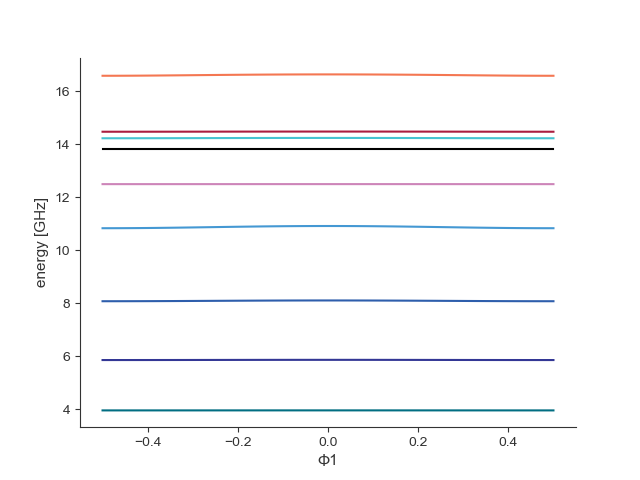

In [ ]:
%matplotlib widget
flux_res_array = np.linspace(-0.5, 0.5, 51)
fig, ax = fluxonium_resonator.plot_evals_vs_paramvals("Φ1", flux_res_array, evals_count=8, subtract_ground=False)
ax.plot(flux_res_array,13.8*np.ones_like(flux_res_array), color='k')
plt.show()

In [88]:
phi0 = const.h/const.e/2
phi0**2/(0.15e9*const.h)*0.03

1.2906403729652257e-06

In [99]:
5.5e9**4/(8*33e9)**2/3e6

4376446759.259259

In [9]:
high_coherence_fluxonium = sq.Fluxonium(EC=1, EL = 0.64, EJ = 5.57, cutoff=120, flux = 0)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

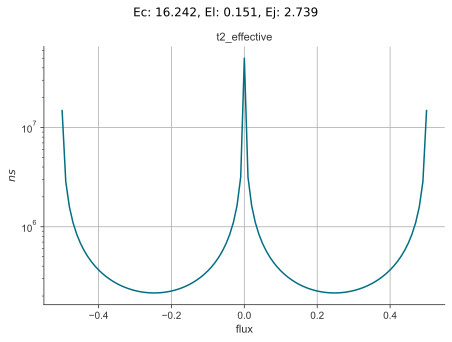

In [23]:
qubit = fluxonium
flux_array = np.linspace(-0.5, 0.5, 101)
fig, ax = qubit.plot_t2_effective_vs_paramvals(param_name='flux',
                                     param_vals=flux_array,
                                     noise_channels=['tphi_1_over_f_cc','tphi_1_over_f_flux',('t1_flux_bias_line', dict(M=1000)), 't1_inductive', 't1_quasiparticle_tunneling'],
                                     common_noise_options=dict(T=0.015)
                                     )
fig.suptitle(f'Ec: {np.round(qubit.EC,3)}, El: {np.round(qubit.EL,3)}, Ej: {np.round(qubit.EJ,3)}')
fig.tight_layout()

In [198]:
e_charge = 1.6e-19
h = 6.62e-34
Cj = 28.8e-15
Lj = 4.62e-9
varphi = 2e-15/2/np.pi
Ec = e_charge**2/2/Cj/h*1e-9*1.46
Ej = varphi**2/Lj/h*1e-9/1.46
Ej*0.04

0.9076270384627797

In [200]:
Ej = varphi**2/Lj/h*1e-9
Ej

33.12838690389146

In [ ]:
e_charge**2/2/Cj/h*1e-9*1.46/0.04

In [333]:
blochnium.anharmonicity()

-0.39426977133654273

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

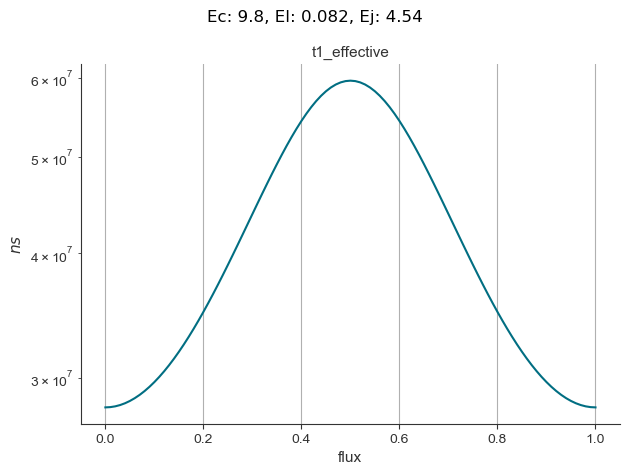

In [293]:
blochnium = sq.Fluxonium(EC= 7, EL = 0.065, EJ= 4.7,flux=0, cutoff=120)
flux_array = np.linspace(0, 1, 101)
fig, ax = blochnium.plot_t1_effective_vs_paramvals(param_name='flux',
                                     param_vals=flux_array,
                                     noise_channels=[('t1_flux_bias_line', dict(M=400)), 't1_inductive', 't1_quasiparticle_tunneling'],
                                     common_noise_options=dict(T=0.015)
                                     )
fig.suptitle(f'Ec: {np.round(fluxonium.EC,3)}, El: {np.round(fluxonium.EL,3)}, Ej: {np.round(fluxonium.EJ,3)}')
fig.tight_layout()

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

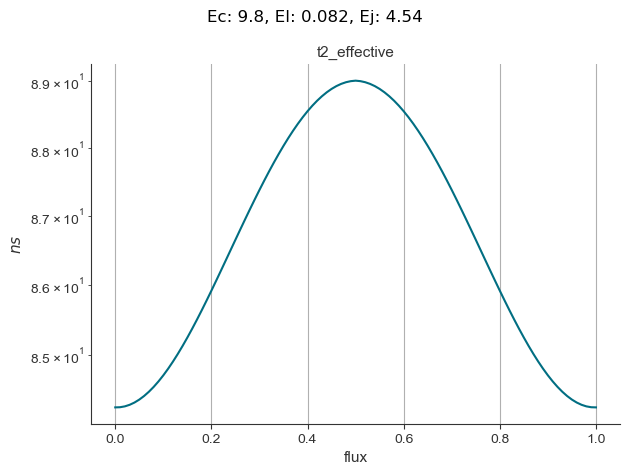

In [ ]:
flux_array = np.linspace(0, 1, 101)
fig, ax = fluxonium.plot_t2_effective_vs_paramvals(param_name='flux',
                                     param_vals=flux_array,
                                     noise_channels=['tphi_1_over_f_cc','tphi_1_over_f_flux','t1_capacitive','t1_charge_impedance',('t1_flux_bias_line', dict(M=1000)), 't1_inductive', 't1_quasiparticle_tunneling'],
                                     common_noise_options=dict(T=0.015)
                                     )
fig.suptitle(f'Ec: {np.round(fluxonium.EC,3)}, El: {np.round(fluxonium.EL,3)}, Ej: {np.round(fluxonium.EJ,3)}')
fig.tight_layout()

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

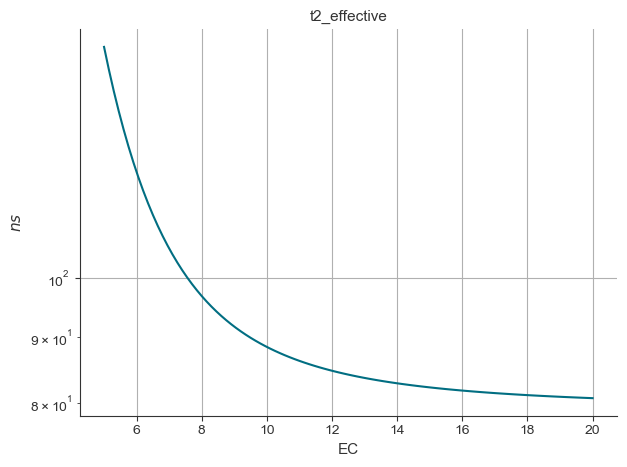

In [270]:
Ec_array = np.linspace(5, 20, 101)
fig, ax = fluxonium.plot_t2_effective_vs_paramvals(param_name='EC',
                                     param_vals=Ec_array,
                                     noise_channels=['tphi_1_over_f_cc','tphi_1_over_f_flux','t1_capacitive','t1_charge_impedance',('t1_flux_bias_line', dict(M=1000)), 't1_inductive', 't1_quasiparticle_tunneling'],
                                     common_noise_options=dict(T=0.015)
                                     )